## Exercise 1 [30pts]

This exercise will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. [5pts]

You can assume the model is sequential and only uses dense layers. The output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look something like this

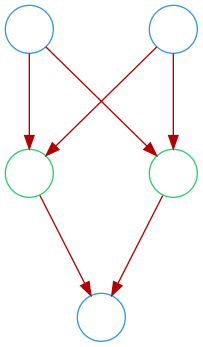

In [ ]:
from IPython.display import Image
Image(filename="example.png")

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from keras.models import Sequential
import matplotlib.pyplot as plt

# !apt-get install -y graphviz libgraphviz-dev pkg-config
# !pip install pygraphviz

def keras_network_to_image(model, filename):

    # Create a NetworkX graph to represent the network
    graph = nx.DiGraph()
    for i, layer in enumerate(model.layers):
        # Add a node for the layer
        graph.add_node(i, label=layer.name, shape="rectangle")
        # Connect the node to the previous layer's node (if there is a previous layer)
        if i > 0:
            graph.add_edge(i-1, i, arrowhead="normal")
    # Convert the graph to an AGraph object
    agraph = to_agraph(graph)
    # Set some layout options for the graph
    agraph.node_attr.update(color="lightblue2", style="filled")
    agraph.edge_attr.update(color="gray", arrowtail="normal")
    agraph.graph_attr.update(rankdir="LR")
    agraph.draw(filename, format="png", prog="dot")

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Dense(1))
model.add(Dense(1))
model.add(Dense(1))


keras_network_to_image(model, "network.png")


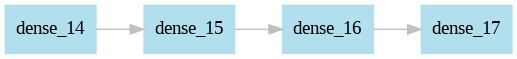

In [ ]:
from IPython.display import Image

Image(filename="network.png")
%matplotlib inline
from IPython.display import Image

Image(filename="network.png")

b) Generate 100 datapoints of the form y = 3x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [2.5pts]

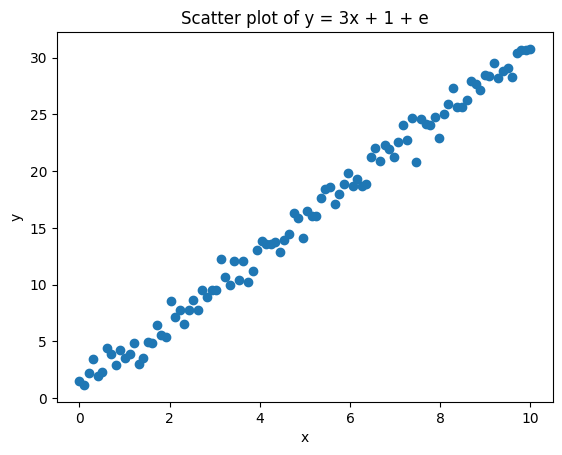

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Generate 100 data points
x = np.linspace(0, 10, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x + 1 + e

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y = 3x + 1 + e')
plt.show()

c) Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset from b). In a 3D plot, plot the weight, the bias, and the loss value. [5pts]

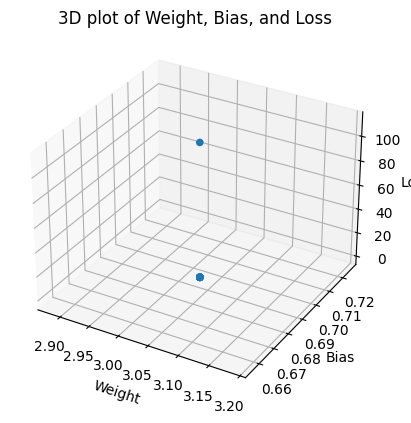

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate 100 data points
x = np.linspace(0, 10, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x + 1 + e

# Create and compile the model
model = Sequential()
model.add(Dense(1, input_shape=(1,), use_bias=True, activation=None))
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
history = model.fit(x, y, epochs=50, verbose=0)

# Get weights and biases
weights = []
biases = []
for layer in model.layers:
    weights.append(layer.get_weights()[0][0][0])
    biases.append(layer.get_weights()[1][0])

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights, biases, history.history['loss'])
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
ax.set_title('3D plot of Weight, Bias, and Loss')
plt.show()


# Generate an image of the model
keras_network_to_image(model, "no_hidden_layers.png")



d) Re-train the model from c) and create an animation of the weight, bias, and loss at each training epoch. [5pts]

In [ ]:
!apt-get install imagemagick


/usr/local/lib/python3.9/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


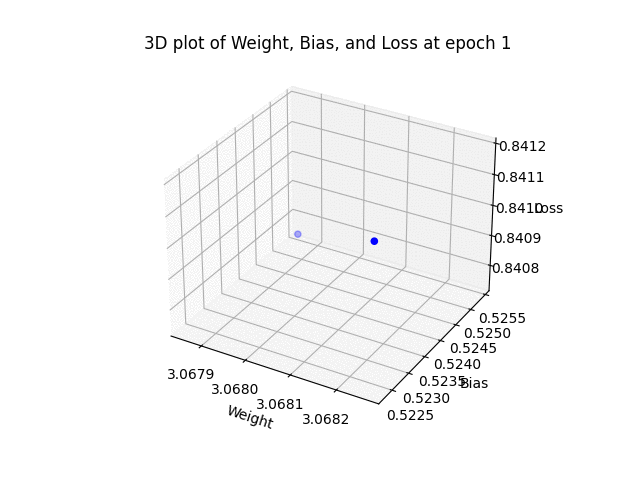

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate 100 data points
x = np.linspace(0, 10, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x + 1 + e

# Create and compile the model
model = Sequential()
model.add(Dense(1, input_shape=(1,), use_bias=True, activation=None))
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model for a single epoch to get initial weight and bias
model.fit(x, y, epochs=1, verbose=0)

# Prepare to store weights, biases, and loss values
weights = []
biases = []
losses = []

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
ax.set_title('3D plot of Weight, Bias, and Loss')

# Function to update the plot at each frame
def update(epoch):
    ax.clear()
    model.fit(x, y, epochs=1, verbose=0)

    weight, bias = model.layers[0].get_weights()
    weight, bias = weight[0][0], bias[0]
    loss = model.evaluate(x, y, verbose=0)

    weights.append(weight)
    biases.append(bias)
    losses.append(loss)

    ax.scatter(weights, biases, losses, c='b')
    ax.set_xlabel('Weight')
    ax.set_ylabel('Bias')
    ax.set_zlabel('Loss')
    ax.set_title(f'3D plot of Weight, Bias, and Loss at epoch {epoch+1}')
    return ax,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(100), interval=50, blit=False)

# Save the animation as a gif
ani.save('weight_bias_loss_animation.gif', writer='imagemagick', fps=15)

# Close the plot
plt.close(fig)

# Display the gif in the notebook
Image(filename='weight_bias_loss_animation.gif')


e) Generate data of the form y = 3x^3 + 2x^2 + x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [2.5pts]

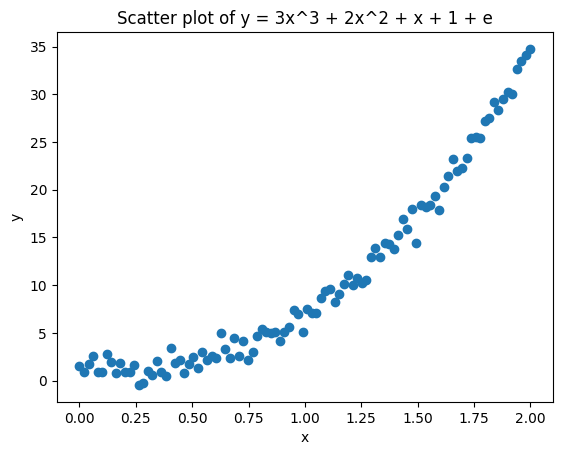

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Generate 100 data points
x = np.linspace(0, 2, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x**3 + 2 * x**2 + x + 1 + e

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y = 3x^3 + 2x^2 + x + 1 + e')
plt.show()


f) Create and train a neural network on the dataset from b) and plot the resulting curve through the scatter plot. (you can use any number of epochs, hidden layers etc.) Also create an image of the network using the function from a) [5pts]

4/4 [==============================] - 0s 4ms/step


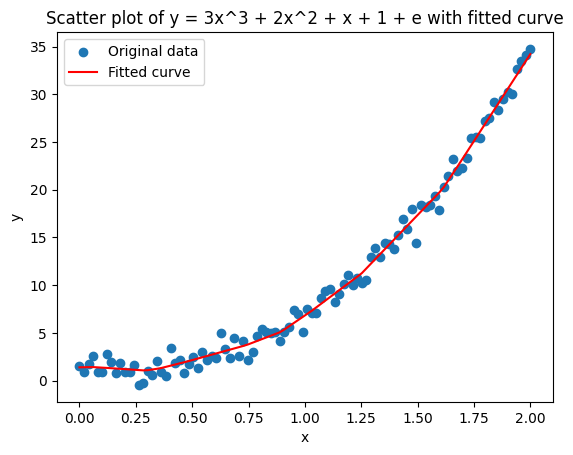

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate 100 data points
x = np.linspace(0, 2, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x**3 + 2 * x**2 + x + 1 + e

# Create and compile the model
model = Sequential()
model.add(Dense(64, input_shape=(1,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation=None))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=1000, verbose=0)

# Make predictions
y_pred = model.predict(x)

# Create a scatter plot
plt.scatter(x, y, label='Original data')
plt.plot(x, y_pred, color='red', label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y = 3x^3 + 2x^2 + x + 1 + e with fitted curve')
plt.legend()
plt.show()

# Generate an image of the model
keras_network_to_image(model, "Q1f.png")


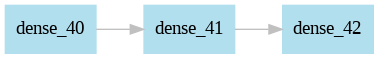

In [ ]:
from IPython.display import Image

Image(filename="Q1f.png")
%matplotlib inline
from IPython.display import Image

Image(filename="Q1f.png")

g) Using matplotlib animation, create an animation of the resulting curve from your model at each training epoch (up to 100 epochs). [5pts]

4/4 [==============================] - 0s 3ms/step


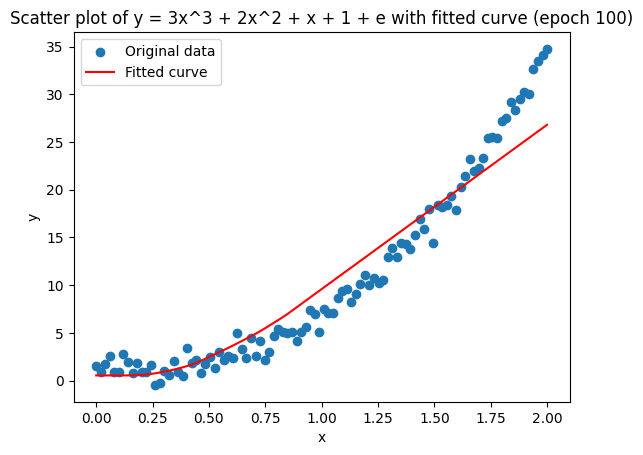

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate 100 data points
x = np.linspace(0, 2, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x**3 + 2 * x**2 + x + 1 + e

# Create and compile the model
model = Sequential()
model.add(Dense(64, input_shape=(1,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation=None))
model.compile(optimizer='adam', loss='mean_squared_error')

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y, label='Original data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of y = 3x^3 + 2x^2 + x + 1 + e with fitted curve')

# Prepare the curve
curve, = ax.plot(x, model.predict(x), color='red', label='Fitted curve')
ax.legend()

# Function to update the plot at each frame
def update(epoch):
    model.fit(x, y, epochs=1, verbose=0)
    y_pred = model.predict(x)
    curve.set_data(x, y_pred)
    ax.set_title(f'Scatter plot of y = 3x^3 + 2x^2 + x + 1 + e with fitted curve (epoch {epoch+1})')
    return curve,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(100), interval=50, blit=True)

# Display the animation
HTML(ani.to_html5_video())


## Exercise 2 [50pts]

In this excerise we will be implementing logic gates in various forms.

### Part A: <b> [25pts] </b>

Recall in a logistic regression model we would find the weights and bias such that
$$P(y=1)=\sigma(w_1 x_1 + w_2 x_2 + b)$$

This means that when $w_1 x_1 + w_2 x_2 + b >0 $ we would predict y = 1. Moving b to the other side, we notice that only when $w_1 x_1 + w_2 x_2 < b $ do we predict y = 1. So the term b acts as a threshold past which the weighted sum of x's would cause the model to predict one class over the other.

In this part you are asked to find (not through gradient descent but through your own understanding of the functions below) the weights and threshold that appropriately describe the function being modeled.

Additional Resource/Hint: [Realization of Logic Gates Using MccullochPitts Neuron Model](https://ijettjournal.org/assets/year/2017/volume-45/number-2/IJETT-V45P212.pdf)

a) Implement the following logic gates <b> - [20pts] </b> <br>
<ul>
    <li>2 input AND gate</li>
    <li>2 input OR gate</li>
    <li>2 input NOR gate</li>
    <li>1 input NOT gate</li>
    <li>2 input NAND gate</li>
</ul>

by finding the correct weights and threshold.

Additional Resource:[Boolean Algebra Truth Tables for Logic Gate Functions](https://www.electronics-tutorials.ws/boolean/bool_7.html#:~:text=The%20table%20used%20to%20represent,of%20these%20input(s).)

In [ ]:
"""
params
--------------
a = input 1
b = input 2

other definations
--------------
w1 = weight associated with input 1
w2 = weight associated with input 2

returns
--------------
Y = output of the gate
"""
def and_gate(a,b):
    w1 = 1  #TODO set weight w1
    w2 = 1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = 1.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

def or_gate(a,b):
    w1 = 1  #TODO set weight w1
    w2 = 1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = 0.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

def not_gate(a):
    w1 = -1  #TODO set weight w1
    g = w1*a
    threshold = -0.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

def nor_gate(a,b):
    w1 = -1  #TODO set weight w1
    w2 = -1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = -0.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

def nand_gate(a,b):
    w1 = -1  #TODO set weight w1
    w2 = -1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = -1.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

In [ ]:
# run this cell to check your fucntions
# the output provided it just a sample output. you can check for any values of a and b

def gates(c, a, b=None):
    if c == 1:
        return and_gate(a, b)
    elif c == 2:
        return or_gate(a, b)
    elif c == 3:
        return not_gate(a)
    elif c == 4:
        return nor_gate(a, b)
    elif c == 5:
        return nand_gate(a, b)
    else:
        return "Please check your choice"

def inputv(c):
    a = int(input(("Enter 1st value: ")))
    if (a>1 or a<0):
        print("Please check input")
    else:
        if c!=3:
            b = int(input(("Enter 2st value: ")))
            if (b>1 or b<0):
                print("Please check input")
            return(a,b)
    return(a)


while True:
    c = int(input("\n\nEnter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit\n"))
    if c == 6:
        break
    elif c not in range(1, 7):
        print("Please enter a valid choice")
        continue
    else:
        if c != 3:
            a = int(input("Enter 1st value: "))
            b = int(input("Enter 2nd value: "))
            if a not in [0, 1] or b not in [0, 1]:
                print("Please check input")
                continue
        else:
            a = int(input("Enter value: "))
            if a not in [0, 1]:
                print("Please check input")
                continue
        y = gates(c, a, b)
        print("Y =", y)



Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
1
Enter 1st value: 1
Enter 2nd value: 0
Y = 0


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
2
Enter 1st value: 1
Enter 2nd value: 0
Y = 1


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
3
Enter value: 1
Y = 0


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
4
Enter 1st value: 1
Enter 2nd value: 0
Y = 0


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
5
Enter 1st value: 1
Enter 2nd value: 0
Y = 1


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
6


b) implement a XOR gate <b> - [5pts] </b>

Hint: XOR can be implemented as a combination of OR, NAND and AND gates. You can reuse your functions from above

### Part B: Perceptron Learning Rule [25pts]

a) Inspired by the previous homework's implementation of logistic regression, implement a 2 input OR gate using perceptron learning rule <b>- [20pts] </b>

Recall: A perceptron is a no-hidden-layer neural network (like logistic regression) with a single output that is the activation of a weighted sum (plus a bias) of the inputs.

Your implementation should:
- use a bias
- have a configurable input size (the output size will always be 1)
- have a configurable learning rate
- have a configurable number of epochs
- have a configurable batch size
- support at least two types of activation functions
- support at least two types of losses / cost functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """
    Implement a perceptron network
    """
    ...


if __name__ == '__main__':
  X = np.array([
                [0,0],
                [0,1],
                [1,0],
                [1,1]
  ])
  y = np.array([0,1,1,1])

  perceptron_or = Perceptron(input_size=2)
  perceptron_or.fit(X, y)

b) How were the weights and biases you discovered in part B different from the ones you defined in part A for the OR gate? [5pts]

## Exercise 3 [20pts]

This exercise will focus on Neural Networks.



In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.optim import SGD, Adam
from tqdm import tqdm

a) Modify the number of layers to include atleast 2 hidden layers with appropriate number of neurons that use the sigmoid function in the forward pass. Also change the epochs, criterion, batch_size. [5pts]

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size):
    super(NeuralNetwork, self).__init__()
    # You are free to define any number of layers you want to here

    self.layer1 = nn.Linear(input_size, 800)
    # your code here
    self.output = nn.Linear(300, 10)
    self.dropout = nn.Dropout(0.2)


  def forward(self, input):
    x = F.relu(self.layer1(input))
    # your code here
    x = self.dropout(x)
    outputs = self.output(x)

    return F.softmax(outputs)

epochs = 10                      # number of epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")     # device
criterion = nn.CrossEntropyLoss() # loss function
batch_size = 500

Run the following cell everytime you update the above code

In [ ]:
net = NeuralNetwork(784).to(device)
optimizer = Adam(net.parameters(), lr = 1e-2)

total_loss = 0


#######################################
### Downloading the data


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2)
train_dataloader2 = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2)
test_dataloader2 = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2)

b) You may change the architecture to increase the accuracy of this model. The goal is to attain the highest possible accuracy. You do not get marks for accuracies less than 83%. You may modify the values in part a [10pts]

In [ ]:
for epoch in tqdm(range(epochs)):
  epoch_loss = 0
  for i, data in enumerate(train_dataloader):
    inputs, labels = data

    optimizer.zero_grad()
    outputs = net(inputs.view(batch_size,-1).to(device))

    labels_ = F.one_hot(labels, num_classes= 10)

    loss = criterion(outputs,labels_.to(device).float())
    loss.backward()  # update network parameters

    optimizer.step() # update the optimizer parameters

    total_loss += loss.item()
    epoch_loss += loss.item()

  with torch.no_grad():
    net.eval()
    correct = 0
    total = 0
    for i, data in enumerate(train_dataloader2):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy()
      correct += sum(1*(labels.numpy()==predictions))

  with torch.no_grad():
    net.eval()
    correct_test = 0
    total_test = 0
    for i, data in enumerate(test_dataloader):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total_test+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy()
      correct_test += sum(1*(labels.numpy()==predictions))

  print("epoch = ", epoch, " loss = ", epoch_loss, "  training accuracy = ", correct/total, "test accuracy = ", correct_test/total_test)